In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../01.Data_Collection/films.csv')

print(df.shape)
df.sample()

(839, 34)


,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,배역명,영화코드,배우코드,주연배우,역할_배우,배우성별,작가,작가코드,대표작가,역할_시나리오(각본),작가성별,F-rated,감독코드,대표감독,역할_감독,감독성별
468,131.0,아이엠 호프맨,2017.11.16,"20,126,000",0.0%,"20,126,000","2,773","2,773",7,119,한국,한국,52DAYS FILM,52DAYS FILM,전체관람가,다큐멘터리,나현태,"임만호,김용순",NaN,20175047.0,20285369.0,임만호,배우,남자,빈선화,20185417.0,빈선화,시나리오(각본),여자,1,20284869.0,나현태,감독,남자


In [7]:
df.dtypes

순위             float64
영화명             object
개봉일             object
매출액             object
매출액점유율          object
누적매출액           object
관객수             object
누적관객수           object
스크린수            object
상영횟수            object
대표국적            object
국적              object
제작사             object
배급사             object
등급              object
장르              object
감독              object
배우              object
배역명             object
영화코드            object
배우코드           float64
주연배우            object
역할_배우           object
배우성별            object
작가              object
작가코드           float64
대표작가            object
역할_시나리오(각본)     object
작가성별            object
F-rated          int64
감독코드           float64
대표감독            object
역할_감독           object
감독성별            object
dtype: object

In [8]:
# corr 보기 위해 숫자로 표현된 컬럼만 남기기 + 식별을 위해 영화명, 영화코드 포함
df_in_digit = df[['영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수', 'F-rated']]
df_in_digit = df_in_digit[df_in_digit['개봉일'].notnull()]
print(df_in_digit.isnull().sum())
print(df_in_digit.shape)
df_in_digit.sample()

영화명        0
영화코드       0
개봉일        0
매출액        0
매출액점유율     0
누적매출액      0
관객수        0
누적관객수      0
스크린수       0
상영횟수       0
F-rated    0
dtype: int64
(808, 11)


,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated
736,노리개: 그녀의 눈물,20191744.0,2019.6.13,"28,206,250",0.0%,"28,206,250","3,664","3,664",50,484,0


In [9]:
# 컬럼 dtype 변경
# 매출액, 매출액점유율, 누적매출액, 관객수, 누적관객수, 스크린수, 상영횟수 -> int
columns = ['매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']

for c in columns:
    print(c)
    print(df_in_digit[c].dtype)
    if c == '매출액점유율': df_in_digit[c] = df_in_digit[c].apply(lambda x: float(x.replace('%','')))
    else:
        df_in_digit[c] = df_in_digit[c].apply(lambda x: int(x.replace(',', '').replace('%','')))
    
df_in_digit.dtypes

매출액
object
매출액점유율
object
누적매출액
object
관객수
object
누적관객수
object
스크린수
object
상영횟수
object


영화명         object
영화코드        object
개봉일         object
매출액          int64
매출액점유율     float64
누적매출액        int64
관객수          int64
누적관객수        int64
스크린수         int64
상영횟수         int64
F-rated      int64
dtype: object

In [10]:
df_in_digit['개봉일'] = pd.to_datetime(df_in_digit['개봉일'])
df_in_digit['year'] = pd.to_datetime(df_in_digit['개봉일']).dt.year
df_in_digit['month'] = pd.to_datetime(df_in_digit['개봉일']).dt.month
df_in_digit['day'] = pd.to_datetime(df_in_digit['개봉일']).dt.day
df_in_digit['dayofweek'] = pd.to_datetime(df_in_digit['개봉일']).dt.dayofweek

In [11]:
df_in_digit.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.997869,1.000000,0.999190,0.999192,0.776339,0.944985,-0.117557,0.013476,0.015759,-0.029194,-0.286490
매출액점유율,0.997869,1.000000,0.997875,0.995656,0.995667,0.772840,0.945209,-0.117623,0.025950,0.010284,-0.024255,-0.283503
누적매출액,1.000000,0.997875,1.000000,0.999187,0.999190,0.776384,0.945012,-0.117526,0.013537,0.015649,-0.029256,-0.286543
관객수,0.999190,0.995656,0.999187,1.000000,0.999999,0.775784,0.942876,-0.117042,0.003467,0.017222,-0.028603,-0.286909
누적관객수,0.999192,0.995667,0.999190,0.999999,1.000000,0.775841,0.942915,-0.116990,0.003546,0.017092,-0.028675,-0.286970
스크린수,0.776339,0.772840,0.776384,0.775784,0.775841,1.000000,0.876827,-0.121113,0.130484,-0.011587,-0.002000,-0.447734
상영횟수,0.944985,0.945209,0.945012,0.942876,0.942915,0.876827,1.000000,-0.113023,0.048943,-0.014570,-0.020723,-0.347923
F-rated,-0.117557,-0.117623,-0.117526,-0.117042,-0.116990,-0.121113,-0.113023,1.000000,0.047348,-0.006891,0.002593,0.054074
year,0.013476,0.025950,0.013537,0.003467,0.003546,0.130484,0.048943,0.047348,1.000000,-0.126272,0.030652,-0.158594
month,0.015759,0.010284,0.015649,0.017222,0.017092,-0.011587,-0.014570,-0.006891,-0.126272,1.000000,-0.055615,0.058097


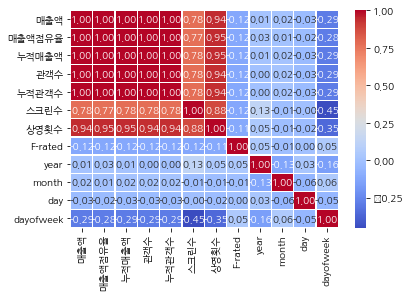

In [12]:
# plt.figure(figsize=[16, 16])
sns.heatmap(df_in_digit.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')